In [1]:
pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "d:\anaconda\envs\py309\lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "d:\anaconda\envs\py309\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "d:\anaconda\envs\py309\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "d:\anaconda\envs\py309\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 126, in _parse_requirement_details
          marker = _parse_requirement_marker(
        File "d:\anaconda\envs\py309\lib\site-packa

In [1]:
import os 
import time
import uuid
import cv2


In [2]:
IMAGES_PATH=os.path.join("data",'images')
number_images=30

In [4]:
IMAGES_PATH

'data\\images'

In [3]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [6]:
pip install labelme


^C
Note: you may need to restart the kernel to use updated packages.


In [1]:
!labelme

2024-03-19 19:26:31,449 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\joelj\.labelmerc


In [3]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [4]:
gpus=tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [6]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:

images=tf.data.Dataset.list_files('D:\\face\\data\\images\\*.jpg')

In [8]:

images.as_numpy_iterator().next()

b'D:\\face\\data\\images\\44c54d0b-e293-11ee-af3b-141333e1c5ab.jpg'

In [9]:

def load_image(x):
    byte_img=tf.io.read_file(x)
    img=tf.io.decode_jpeg(byte_img)
    return img


In [13]:

images=images.map(load_image)
images.as_numpy_iterator().next()

TypeError: in user code:

    File "C:\Users\joelj\AppData\Local\Temp\ipykernel_15884\2478411479.py", line 2, in load_image  *
        byte_img=tf.io.read_file(x)

    TypeError: Input 'filename' of 'ReadFile' Op has type uint8 that does not match expected type of string.


In [14]:
image_generator=images.batch(4).as_numpy_iterator()

In [15]:
plot_images=image_generator.next()

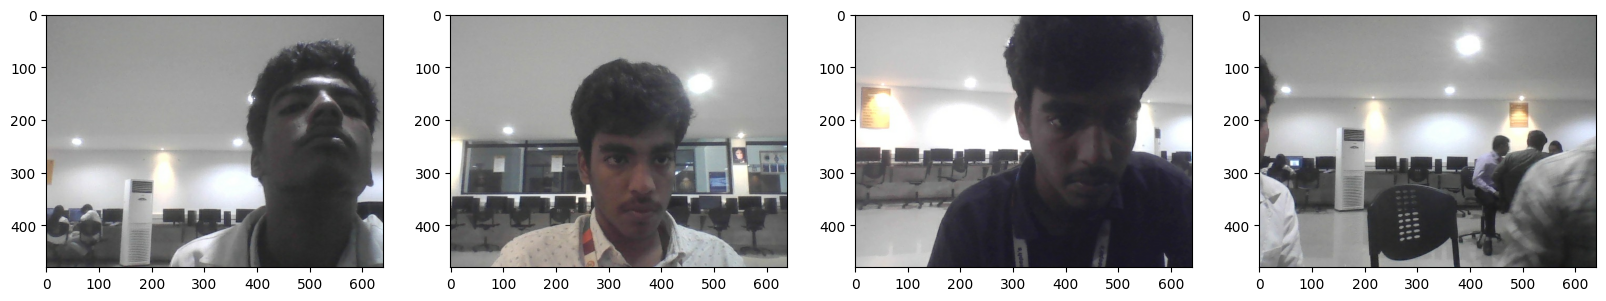

In [16]:
fig ,ax =plt.subplots(ncols=4,figsize=(20,20))
for idx,image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [17]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

In [18]:
pip install albumentations

^C
Note: you may need to restart the kernel to use updated packages.


  Using cached albumentations-1.4.1-py3-none-any.whl.metadata (36 kB)
  Using cached scikit_learn-1.4.1.post1-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
Using cached albumentations-1.4.1-py3-none-any.whl (130 kB)
Using cached opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl (38.5 MB)
Using cached scikit_learn-1.4.1.post1-cp39-cp39-win_amd64.whl (10.6 MB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'd:\\anaconda\\envs\\py309\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [31]:
import albumentations as alb

ModuleNotFoundError: No module named 'albumentations'

In [14]:
augmentor=alb.Compose([alb.RandomCrop(width=450,height=450),
                       alb.HorizontalFlip(p=0.5),
                       alb.RandomBrightnessContrast(p=0.2),
                       alb.RandomGamma(p=0.2),
                       alb.RGBShift(p=0.2),
                       alb.VerticalFlip(p=0.5)],
                       bbox_params=alb.BboxParams(format='albumentations',
                                                  label_fields=['class_labels']))


NameError: name 'alb' is not defined

In [19]:
img=cv2.imread(os.path.join('data','train','images','1f7328a8-e028-11ee-be94-141333e1c5aa.jpg'))

In [20]:
with open(os.path.join('data','train','labels','1f7328a8-e028-11ee-be94-141333e1c5aa.json'),'r') as f:
    label=json.load(f)

In [21]:
label

{'version': '5.4.1',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[298.7037037037037, 28.42592592592598],
    [579.2592592592592, 408.05555555555554]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {},
   'mask': None}],
 'imagePath': '..\\images\\1f7328a8-e028-11ee-be94-141333e1c5aa.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYn

In [22]:
coords=[0,0,0,0]
coords[0]=label['shapes'][0]['points'][0][0]
coords[1]=label['shapes'][0]['points'][0][1]
coords[2]=label['shapes'][0]['points'][1][0]
coords[3]=label['shapes'][0]['points'][1][1]

In [23]:
coords

[298.7037037037037, 28.42592592592598, 579.2592592592592, 408.05555555555554]

In [24]:
coords=list(np.divide(coords,[640,480,640,480]))
coords

[0.46672453703703703,
 0.059220679012345796,
 0.9050925925925926,
 0.8501157407407407]

In [25]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

NameError: name 'augmentor' is not defined

In [26]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

NameError: name 'augmented' is not defined

In [27]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'augmentor' is not defined
name 'au

In [28]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [29]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [30]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [31]:
train_images.as_numpy_iterator().next()

array([[[0.00931373, 0.12696078, 0.0877451 ],
        [0.00802696, 0.13057598, 0.08890931],
        [0.00294118, 0.1254902 , 0.08382353],
        ...,
        [0.00392157, 0.12941177, 0.07058824],
        [0.00392157, 0.12941177, 0.07058824],
        [0.00147059, 0.12205882, 0.0754902 ]],

       [[0.01182598, 0.12303922, 0.08596814],
        [0.01133578, 0.12996323, 0.09025735],
        [0.00784314, 0.1264706 , 0.08676471],
        ...,
        [0.00343137, 0.12941177, 0.07009804],
        [0.00343137, 0.12941177, 0.07009804],
        [0.00128676, 0.1245098 , 0.07040441]],

       [[0.00018382, 0.12567402, 0.08253676],
        [0.01268382, 0.13817401, 0.09503677],
        [0.01219363, 0.13768382, 0.09454657],
        ...,
        [0.        , 0.13333334, 0.06666667],
        [0.        , 0.13333334, 0.06666667],
        [0.        , 0.12567402, 0.0689951 ]],

       ...,

       [[0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0

In [32]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [33]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [34]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [35]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [36]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.     , 0.01428, 0.4028 , 0.858  ], dtype=float16))

In [37]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3540, 3540, 780, 780, 840, 840)

In [38]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [39]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [40]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [41]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1]], dtype=uint8),
 array([[0.453  , 0.4412 , 0.8667 , 0.933  ],
        [0.4612 , 0.4924 , 0.893  , 0.968  ],
        [0.1873 , 0.4263 , 0.5825 , 0.947  ],
        [0.5776 , 0.4033 , 0.9624 , 0.897  ],
        [0.4746 , 0.3738 , 0.9644 , 0.9067 ],
        [0.4033 , 0.00901, 0.988  , 0.8813 ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.5176 , 0.06976, 1.     , 0.8022 ]], dtype=float16))

In [42]:
data_samples = train.as_numpy_iterator()

In [43]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


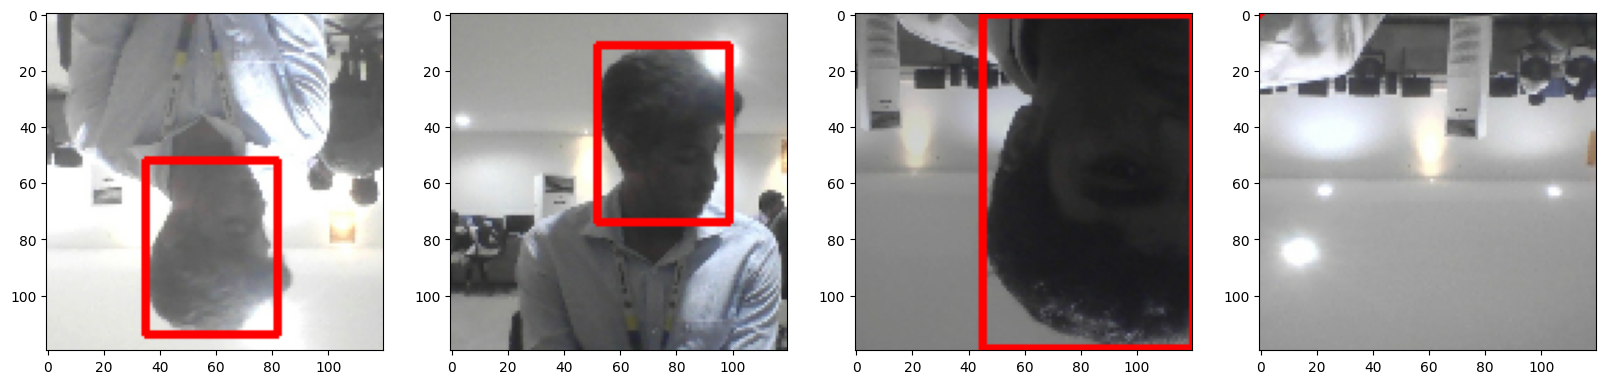

In [44]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    sample_image = sample_image.copy()
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [45]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [46]:
vgg = VGG16(include_top=False)

In [47]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [48]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [49]:
facetracker = build_model()


In [50]:
X, y = train.as_numpy_iterator().next()

In [51]:
X.shape

(8, 120, 120, 3)

In [52]:
classes, coords = facetracker.predict(X)
classes, coords

1/1 [==============================] - 11s 11s/step


(array([[0.41579363],
        [0.33850747],
        [0.35646978],
        [0.3669797 ],
        [0.44982874],
        [0.37627882],
        [0.3915726 ],
        [0.41993642]], dtype=float32),
 array([[0.6139605 , 0.45589033, 0.44172972, 0.43123183],
        [0.6565502 , 0.44093424, 0.40486506, 0.34804234],
        [0.68979365, 0.46319756, 0.35905465, 0.4145164 ],
        [0.6375789 , 0.46211475, 0.4093886 , 0.4137777 ],
        [0.62054133, 0.5015726 , 0.4625225 , 0.442211  ],
        [0.6111266 , 0.4637991 , 0.47889346, 0.38171402],
        [0.5619094 , 0.52508414, 0.44916505, 0.44595063],
        [0.5906395 , 0.49407816, 0.4866323 , 0.3865006 ]], dtype=float32))

In [53]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [54]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [55]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [56]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [57]:
localization_loss(y[1], coords)
classloss(y[0], classes)
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=8.412821>

In [58]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [59]:
model = FaceTracker(facetracker)
model.compile(opt, classloss, regressloss)

In [60]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
443/443 [==============================] - 72s 131ms/step - total_loss: 0.4213 - class_loss: 0.0861 - regress_loss: 0.3782 - val_total_loss: 0.0551 - val_class_loss: 9.8149e-04 - val_regress_loss: 0.0546
Epoch 2/10
443/443 [==============================] - 57s 116ms/step - total_loss: 0.0740 - class_loss: 0.0144 - regress_loss: 0.0668 - val_total_loss: 0.0224 - val_class_loss: 3.2131e-04 - val_regress_loss: 0.0223
Epoch 3/10
443/443 [==============================] - 59s 118ms/step - total_loss: 0.0443 - class_loss: 0.0096 - regress_loss: 0.0395 - val_total_loss: 0.0401 - val_class_loss: 5.5387e-05 - val_regress_loss: 0.0401
Epoch 4/10
443/443 [==============================] - 59s 118ms/step - total_loss: 0.0392 - class_loss: 0.0095 - regress_loss: 0.0344 - val_total_loss: 0.0136 - val_class_loss: 0.0015 - val_regress_loss: 0.0129
Epoch 5/10
443/443 [==============================] - 59s 118ms/step - total_loss: 0.0294 - class_loss: 0.0072 - regress_loss: 0.0258 - val_tota

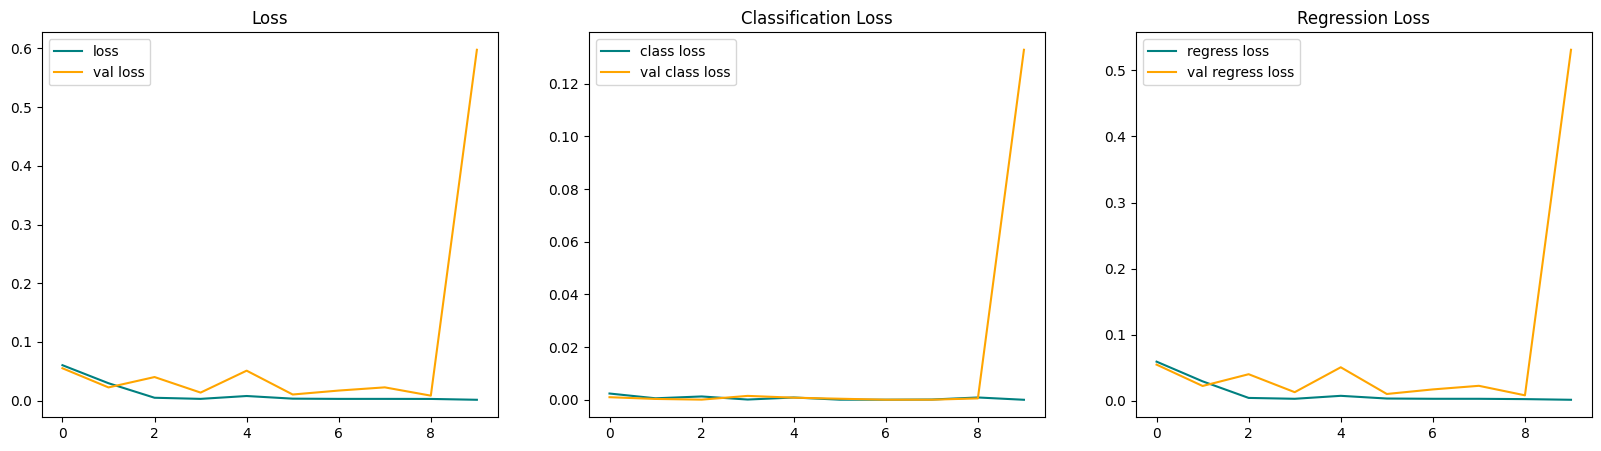

In [61]:
hist.history
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

1/1 [==============================] - 0s 41ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


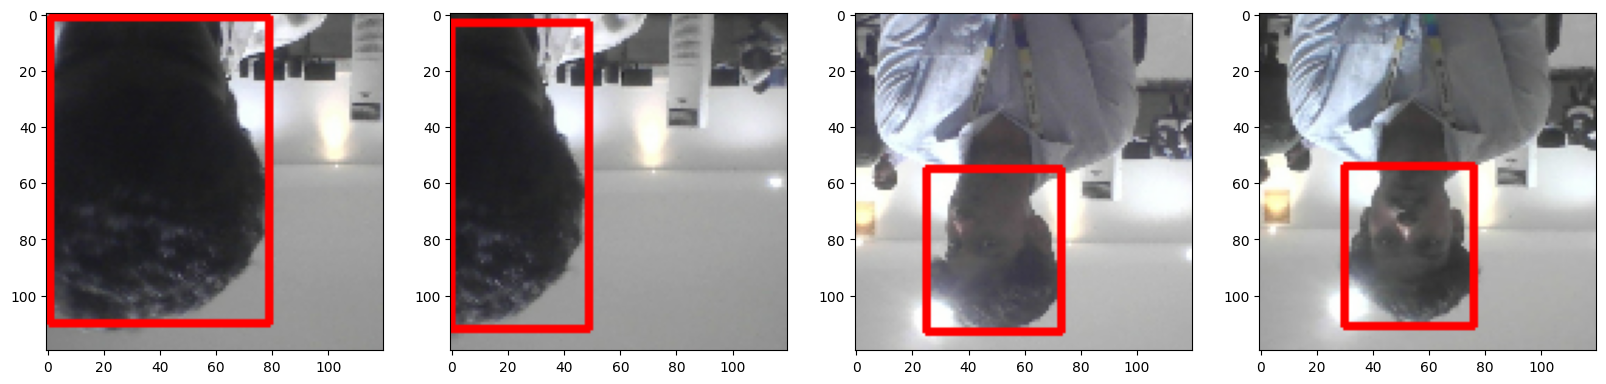

In [62]:
test_data = test.as_numpy_iterator()
test_sample = test_data.next()
yhat = facetracker.predict(test_sample[0])
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    sample_image = sample_image.copy()
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [63]:
from tensorflow.keras.models import load_model

In [64]:
facetracker.save('facetracker.h5')

In [65]:
facetracker = load_model('facetracker.h5')

In [67]:

cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 33ms/step
